# MNIST classification with (Softmax Regression)
On this tutorial we're going to learn how to do Softmax Regression (classification) of the MNIST dataset.
The Softmax Regression is just a generalization of the logistic regression for multiple classes.

### Get MNIST data
The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation).

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### MNIST training data
each sample on the MNIST dataset consist on a 784 feature vector encoding a 28x28 grayscale image. 

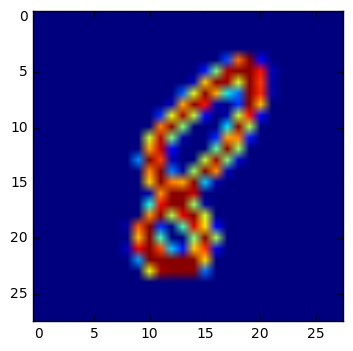

In [29]:
import matplotlib.pyplot as plt
imgDigit = mnist.train.images[0]
plt.imshow(imgDigit.reshape([28,28]))
plt.show()

### Import libraries

In [2]:
import tensorflow as tf
import numpy as np

### Create the graph
Basically we will define our hypothesis as a logistic regression (multiclass)

$$y = \text{softmax}(Wx + b)$$
![title](softmax-regression-vectorequation.png)

In [17]:
# Placeholder will be the graph input, so after we build the graph we can send data to it
# The dimensionality [None, 784] means that can be a matrix with any rows but 784 cols, this
# will be usefull later when we train a batch of images at the same time.
x = tf.placeholder(tf.float32, [None, 784])

# Create the parameters(Weight, Bias) that will be changed during training, 
# Observe that [784, 10] means a weight for each possible feature of our image 28x28, and 10 means the 
# possible output
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Now our graph(model/hypothesis)
y = tf.nn.softmax(tf.matmul(x, W) + b)

### Define a loss function and how to optimize it

In [ ]:
# Create another placeholder to receive our labes during training
y_label = tf.placeholder(tf.float32, [None, 10])
# Define our loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(y), reduction_indices=[1]))

# Configure that we want to use Gradient descent to optimize our loss function
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Build graph
Now we will initialize our variables, and create a session.

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

### Train graph (model/hypothesis)

In [14]:
for i in range(1000):
    # Get a batch of 100 elements on our training set
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # With the session we can execute stuff on our model
    sess.run(train_step, feed_dict={x: batch_xs, y_label: batch_ys})

### Evaluating hypothesis

In [15]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_label,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_label: mnist.test.labels}))

0.9181
